In [1]:
!python -V

Python 3.12.1


In [2]:
# %pip install matplotlib seaborn scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
import pickle # To save the model using pickle

In [5]:
df_new = pd.read_parquet("green_tripdata_2021-01.parquet")

In [6]:
df = df_new.copy()

In [7]:
df.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00
5,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,52.0,0.0,0.5,0.00,0.0,None,0.3,52.80,2.0,1.0,0.00
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,0.0,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.00
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.5,0.5,0.5,0.96,0.0,None,0.3,5.76,1.0,1.0,0.00
8,2,2021-01-01 00:57:46,2021-01-01 00:57:57,N,1.0,225,225,1.0,0.00,2.5,0.5,0.5,0.00,0.0,None,0.3,3.80,2.0,1.0,0.00
9,2,2021-01-01 00:58:32,2021-01-01 01:32:34,N,1.0,225,265,1.0,12.19,38.0,0.5,0.5,2.75,0.0,None,0.3,42.05,1.0,1.0,0.00


In [8]:
list(df.columns)

['VendorID',
 'lpep_pickup_datetime',
 'lpep_dropoff_datetime',
 'store_and_fwd_flag',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'ehail_fee',
 'improvement_surcharge',
 'total_amount',
 'payment_type',
 'trip_type',
 'congestion_surcharge']

In [9]:
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)


In [10]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df["duration"] = df["duration"].apply(lambda td: td.total_seconds() / 60)

In [11]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,...,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,NaN,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,NaN,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,NaN,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,NaN,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


In [12]:
df = df[df.trip_type ==2]

In [13]:
df.duration.describe()

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
25%         0.100000
50%         1.666667
75%        14.216667
max      1416.100000
Name: duration, dtype: float64

In [14]:
df.duration.describe(percentiles=[0.50, 0.95, 0.98, 0.99])

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
50%         1.666667
95%        35.604167
98%        59.339333
99%       149.837833
max      1416.100000
Name: duration, dtype: float64

In [15]:
((df.duration >= 1) & (df.duration <= 60)).mean()

np.float64(0.5169628432956381)

In [16]:
df = df_new.copy()

In [17]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df["duration"] = df["duration"].apply(lambda td: td.total_seconds() / 60)

In [18]:
df[(df.duration >= 1) & (df.duration <= 60)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.5,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,NaN,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,NaN,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,NaN,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,NaN,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


In [19]:
td = df.duration.iloc[0]

In [20]:
td

np.float64(3.933333333333333)

In [21]:
# td.total_seconds()

In [22]:
# td.total_seconds()/60

In [23]:
df = df[df.trip_type == 2]

In [24]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0.116667
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0.033333
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0,19.766667
43,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,...,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0,121.200000
45,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,...,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.00,0.0,None,0.3,10.30,2.0,2.0,0.0,9.450000
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.00,0.0,None,0.3,30.30,2.0,2.0,0.0,35.033333
40377,2,2021-01-31 20:09:41,2021-01-31 20:10:21,N,5.0,95,95,1.0,0.00,15.0,...,0.0,3.06,0.0,None,0.3,18.36,1.0,2.0,0.0,0.666667
40394,2,2021-01-31 20:38:42,2021-01-31 20:38:45,N,5.0,75,264,1.0,0.00,5.0,...,0.0,0.20,0.0,None,0.3,5.50,1.0,2.0,0.0,0.050000


In [25]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df['duration'] = df.duration.apply(lambda td: td.total_seconds() / 60)

In [26]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0.116667
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0.033333
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0,19.766667
43,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,...,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0,121.200000
45,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,...,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.00,0.0,None,0.3,10.30,2.0,2.0,0.0,9.450000
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.00,0.0,None,0.3,30.30,2.0,2.0,0.0,35.033333
40377,2,2021-01-31 20:09:41,2021-01-31 20:10:21,N,5.0,95,95,1.0,0.00,15.0,...,0.0,3.06,0.0,None,0.3,18.36,1.0,2.0,0.0,0.666667
40394,2,2021-01-31 20:38:42,2021-01-31 20:38:45,N,5.0,75,264,1.0,0.00,5.0,...,0.0,0.20,0.0,None,0.3,5.50,1.0,2.0,0.0,0.050000


In [27]:
df['duration'].describe()

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
25%         0.100000
50%         1.666667
75%        14.216667
max      1416.100000
Name: duration, dtype: float64

In [28]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    1238.000000
mean       18.305493
std       108.364382
min         0.000000
95%        35.604167
98%        59.339333
99%       149.837833
max      1416.100000
Name: duration, dtype: float64

In [29]:
round(100 * ((df['duration'] >= 1) & (df['duration'] <= 60)).mean(), 2)

np.float64(51.7)

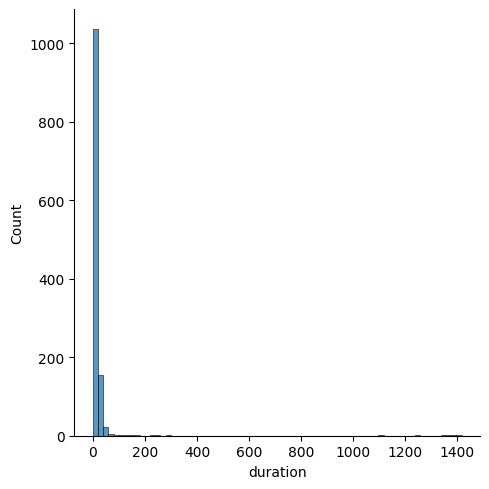

In [31]:
sns.displot(df.duration)

In [32]:
df[(df.duration >= 1) & (df.duration <= 60)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.0,0.0,None,0.3,13.3,2.0,2.0,0.0,19.766667
53,2,2021-01-01 01:54:51,2021-01-01 02:15:35,N,5.0,74,94,1.0,5.82,18.0,...,0.0,0.0,0.0,None,0.3,18.3,2.0,2.0,0.0,20.733333
69,2,2021-01-01 02:42:49,2021-01-01 02:50:59,N,5.0,136,241,1.0,0.57,9.0,...,0.0,0.0,0.0,None,0.3,9.3,2.0,2.0,0.0,8.166667
88,2,2021-01-01 04:52:02,2021-01-01 05:05:01,N,5.0,247,75,1.0,3.43,15.0,...,0.0,0.0,0.0,None,0.3,15.3,2.0,2.0,0.0,12.983333
96,2,2021-01-01 05:52:43,2021-01-01 05:58:02,N,5.0,7,7,1.0,0.65,50.0,...,0.0,7.0,0.0,None,0.3,57.3,1.0,2.0,0.0,5.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40324,2,2021-01-31 18:42:52,2021-01-31 19:08:44,N,5.0,69,213,2.0,5.40,16.0,...,0.0,0.0,0.0,None,0.3,16.3,2.0,2.0,0.0,25.866667
40352,1,2021-01-31 19:32:22,2021-01-31 19:50:16,N,5.0,82,129,2.0,2.40,0.0,...,0.0,0.0,0.0,None,0.0,0.0,2.0,2.0,0.0,17.900000
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.0,0.0,None,0.3,10.3,2.0,2.0,0.0,9.450000
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.0,0.0,None,0.3,30.3,2.0,2.0,0.0,35.033333


In [33]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
6,2,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,...,0.0,36.06,0.0,None,0.3,216.36,1.0,2.0,0.0,0.116667
15,2,2021-01-01 00:29:05,2021-01-01 00:29:07,N,5.0,42,264,1.0,0.00,10.0,...,0.0,2.06,0.0,None,0.3,12.36,1.0,2.0,0.0,0.033333
30,2,2021-01-01 00:35:29,2021-01-01 00:55:15,N,5.0,74,247,1.0,3.64,13.0,...,0.0,0.00,0.0,None,0.3,13.30,2.0,2.0,0.0,19.766667
43,2,2021-01-01 23:12:41,2021-01-02 01:13:53,N,5.0,95,82,1.0,0.00,9.7,...,0.0,2.00,0.0,None,0.3,12.00,1.0,2.0,0.0,121.200000
45,2,2021-01-01 01:49:29,2021-01-01 01:49:33,N,5.0,244,244,5.0,0.02,12.0,...,0.0,2.46,0.0,None,0.3,14.76,1.0,2.0,0.0,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40363,2,2021-01-31 19:26:20,2021-01-31 19:35:47,N,5.0,167,248,2.0,1.31,10.0,...,0.0,0.00,0.0,None,0.3,10.30,2.0,2.0,0.0,9.450000
40364,2,2021-01-31 19:44:54,2021-01-31 20:19:56,N,5.0,147,147,2.0,6.97,30.0,...,0.0,0.00,0.0,None,0.3,30.30,2.0,2.0,0.0,35.033333
40377,2,2021-01-31 20:09:41,2021-01-31 20:10:21,N,5.0,95,95,1.0,0.00,15.0,...,0.0,3.06,0.0,None,0.3,18.36,1.0,2.0,0.0,0.666667
40394,2,2021-01-31 20:38:42,2021-01-31 20:38:45,N,5.0,75,264,1.0,0.00,5.0,...,0.0,0.20,0.0,None,0.3,5.50,1.0,2.0,0.0,0.050000


In [34]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [35]:
df[categorical].astype(str).dtypes

PULocationID    str
DOLocationID    str
dtype: object

In [36]:
df[categorical] = df[categorical].astype(str)

In [37]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag                  str
RatecodeID                      float64
PULocationID                        str
DOLocationID                        str
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [38]:
df[categorical + numerical].iloc[:10].to_dict(orient='records')

[{'PULocationID': '265', 'DOLocationID': '265', 'trip_distance': 0.0},
 {'PULocationID': '42', 'DOLocationID': '264', 'trip_distance': 0.0},
 {'PULocationID': '74', 'DOLocationID': '247', 'trip_distance': 3.64},
 {'PULocationID': '95', 'DOLocationID': '82', 'trip_distance': 0.0},
 {'PULocationID': '244', 'DOLocationID': '244', 'trip_distance': 0.02},
 {'PULocationID': '74', 'DOLocationID': '94', 'trip_distance': 5.82},
 {'PULocationID': '136', 'DOLocationID': '241', 'trip_distance': 0.57},
 {'PULocationID': '32', 'DOLocationID': '264', 'trip_distance': 0.0},
 {'PULocationID': '247', 'DOLocationID': '75', 'trip_distance': 3.43},
 {'PULocationID': '159', 'DOLocationID': '159', 'trip_distance': 0.0}]

#### Observe that the numerical values are also converted as part of the dictionary. See treatment below:

In [39]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [40]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts) # Fit (i.e. extimate the parameters) and transform (i.e. apply the transformation)
                                        # see end of this notebook for more details on fit_transform().

In [41]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3714 stored elements and shape (1238, 303)>

In [42]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=112',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=121',
 'DOLocationID=124',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=138',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=143',
 'DOLocationID=145',
 'DOLocationID=146',
 'DOLocationID=147',
 'DOLocationID=148',
 'DOLocationID=151',
 'DOLocationID=152',
 'DOLocationID=155',
 'DOLocationID=156',
 'DOLocationID=159',
 'DOLocationID=16',
 'DOLocationID=160',
 'DOLocationID=161',
 'DOLocationID=162',
 'DOLocationID=163',
 'DOLocationID=165',
 'DOLocationID=166',
 'DOLocationID=167',
 'DOLocationID=168',
 'DOLocationID=169',
 'DOLocationID=17',
 'DOLocationID=170',
 'DOLocationID=171

In [43]:
target = 'duration'

In [44]:
y_train = df[target].values

In [45]:
y_train

array([ 0.11666667,  0.03333333, 19.76666667, ...,  0.66666667,
        0.05      , 23.15      ], shape=(1238,))

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [48]:
y_pred = lr.predict(X_train) 

In [49]:
y_pred 

array([ 0.24389493, -4.84871084, 14.48221156, ...,  4.12199875,
       -3.44194773, 25.7316174 ], shape=(1238,))

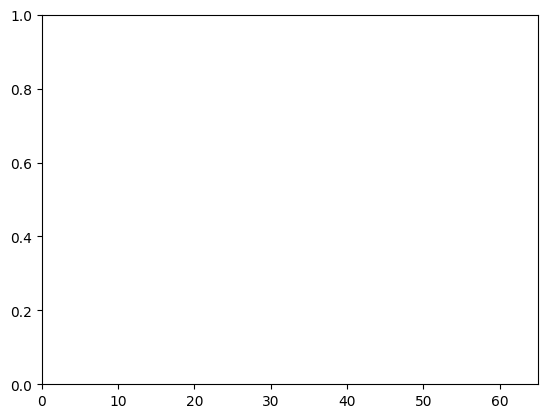

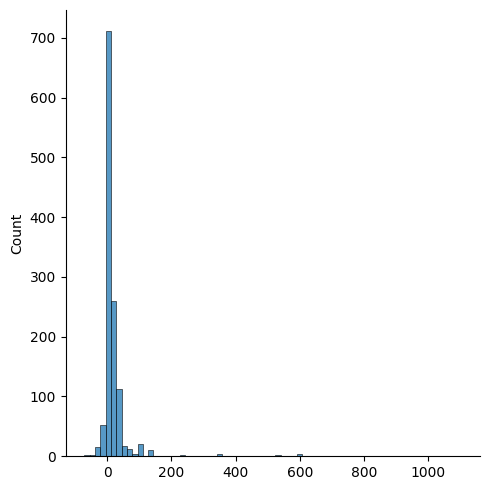

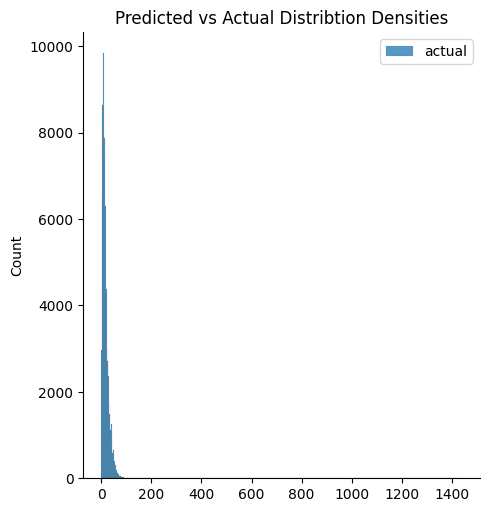

In [61]:
# Limit x-axis for Plot
plt.xlim(0, 65)
sns.displot(y_pred, label = 'predicted')
sns.displot(y_train, label='actual')
plt.title('Predicted vs Actual Distribtion Densities')
plt.legend()

In [62]:
r2 = r2_score(y_train, y_pred)
r2

ValueError: Found input variables with inconsistent numbers of samples: [76518, 1238]

In [52]:
mae = mean_absolute_error(y_train, y_pred) # the parameter, squared, is depreciated.

In [53]:
mae

17.748993209951905

Writing the above into a function we can use:

In [54]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
    
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df["duration"] = df["duration"].apply(lambda td: td.total_seconds() / 60)
    
    print("Average duration: ", ((df.duration >= 1) & (df.duration <= 60)).mean())
    print("Number of records: ", len(df))
    
    categorical = ['PULocationID', 'DOLocationID']
    numerical = ['trip_distance']
    df[categorical].astype(str).dtypes
    df[categorical] = df[categorical].astype(str)
    
    return df

In [55]:
df_train = read_dataframe("green_tripdata_2021-01.parquet")
df_val = read_dataframe("green_tripdata_2021-02.parquet")

Average duration:  0.9658903787344154
Number of records:  76518
Average duration:  0.9589450535835966
Number of records:  64572


In [56]:
len(df_train), len(df_val)

(76518, 64572)

In [57]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']


In [58]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts =df[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [59]:
target = 'duration'
y_train = df_train[target].values
y_val = df_train[target].values

In [ ]:
lr = LinearRegression()
print('X_train', X_train)
print('y_train', y_train)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_absolute_error(y_train, y_pred)

X_train <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3714 stored elements and shape (1238, 303)>
  Coords	Values
  (0, 114)	1.0
  (0, 257)	1.0
  (0, 302)	0.0
  (1, 113)	1.0
  (1, 267)	1.0
  (1, 302)	0.0
  (2, 101)	1.0
  (2, 283)	1.0
  (2, 302)	3.64
  (3, 152)	1.0
  (3, 299)	1.0
  (3, 302)	0.0
  (4, 100)	1.0
  (4, 244)	1.0
  (4, 302)	0.02
  (5, 158)	1.0
  (5, 283)	1.0
  (5, 302)	5.82
  (6, 97)	1.0
  (6, 183)	1.0
  (6, 302)	0.57
  (7, 113)	1.0
  (7, 260)	1.0
  (7, 302)	0.0
  (8, 146)	1.0
  :	:
  (1229, 302)	2.59
  (1230, 77)	1.0
  (1230, 278)	1.0
  (1230, 302)	5.4
  (1231, 113)	1.0
  (1231, 188)	1.0
  (1231, 302)	0.0
  (1232, 15)	1.0
  (1232, 291)	1.0
  (1232, 302)	2.4
  (1233, 102)	1.0
  (1233, 196)	1.0
  (1233, 302)	1.31
  (1234, 28)	1.0
  (1234, 187)	1.0
  (1234, 302)	6.97
  (1235, 159)	1.0
  (1235, 299)	1.0
  (1235, 302)	0.0
  (1236, 113)	1.0
  (1236, 284)	1.0
  (1236, 302)	0.0
  (1237, 98)	1.0
  (1237, 278)	1.0
  (1237, 302)	6.32
y_train [ 3.93333333  8.75        5.

ValueError: Found input variables with inconsistent numbers of samples: [1238, 76518]

In [54]:
# 'models' is a folder, 
# 'lin_reg.bin' is the name of the file where we will save the model
# 'wb' means we are opening the file for 'writing' in 'binary' mode, 
# which is necessary for pickle
with open('models/lin_reg.bin', 'wb') as f_out: 
    pickle.dump((dv, lr), f_out)

#### Trying Out Lasso Regression

In [63]:
# We can change the alpha value to see how it affects the model's performance.
# e.g. alpha = 0.1 (gives mae = 12.9091), 0.01 (gives mae = 12.2152), 0.001 (mae=12.0701), 
# 0.0001 (mae = 12.0572), etc. 
# We could log these observations in a spreadsheet, etc. but we could also move them into something 
# called 'Experiment Tracker'.
lr = Lasso(alpha = 0.01)  

lr.fit(X_train, y_train)

y_val_pred = lr.predict(X_val)

mean_absolute_error(y_val, y_val_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1238, 76518]

In [ ]:
with open('models/lasso.bin', 'wb') as f_out1: 
    pickle.dump((dv, lr), f_out1)

#### Trying out Ridge Regression

In [ ]:
lr = Lasso(alpha = 0.0001)
lr.fit(X_train, y_train)

y_val_pred = lr.predict(X_val)

mean_absolute_error(y_val, y_val_pred)

12.057235877324203

In [ ]:
with open('models/ridge.bin', 'wb') as f_out2:
    pickle.dump((dv, lr), f_out2)

In [ ]:

def build_predict(df, dv, lr):
    dicts = df[categorical + numerical].to_dict(orient='records')
    lr = LinearRegression()
    
    X = dv.transform(dicts)
    y_pred = lr.predict(X)
    return y_pred

### On fit_transform():

 Python (especially in **scikit-learn**), `fit_transform()` can be viewed as:

> **A convenience method that learns parameters from data and then immediately applies the transformation.**

It is simply equivalent to:

```python
transformer.fit(X)
transformer.transform(X)
```

or more compactly:

```python
transformer.fit(X).transform(X)
```

---

## Is `fit()` a transformation?

**No.**
`fit()` is **not** a transformation.

### What `fit()` does:

* Learns parameters from the data
* Stores them inside the model/transformer object
* Does **not** change the data

Example:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
```

Here, `fit()`:

* Computes mean
* Computes standard deviation
* Stores them internally

But `X` is unchanged.

---

## What `transform()` does:

* Uses learned parameters
* Returns transformed data

Example:

```python
X_scaled = scaler.transform(X)
```

Now the data is actually transformed.

---

## So what is `fit_transform()` conceptually?

You can think of it as:

> **"Learn the transformation, then apply it."**

Mathematically:

* `fit()` = estimate parameters θ from data
* `transform()` = apply function f(X; θ)

So:

```
fit_transform(X) = f(X; θ̂)
```

Where θ̂ are the learned parameters.

---

## Quick Intuition Table

| Method            | Learns Parameters? | Changes Data? |
| ----------------- | ------------------ | ------------- |
| `fit()`           | ✅ Yes              | ❌ No          |
| `transform()`     | ❌ No               | ✅ Yes         |
| `fit_transform()` | ✅ Yes              | ✅ Yes         |

---

## In ML terms

* `fit()` = training step
* `transform()` = inference step
* `fit_transform()` = training + inference on same data

---

If you'd like, I can also explain how this relates to:

* PCA
* OneHotEncoder
* Pipelines
* Neural networks (where this separation doesn’t exist as clearly)

Just let me know.


Great — let’s connect `fit()`, `transform()`, and `fit_transform()` to real ML components:

* **PCA**
* **OneHotEncoder**
* **Pipelines**
* **Neural Networks**

---

# 1️⃣ PCA (Principal Component Analysis)

Using scikit-learn:

```python
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
```

### What happens internally?

### `fit(X)`

* Computes covariance matrix
* Finds eigenvectors (principal components)
* Stores them as `pca.components_`

It **learns the rotation matrix**.

### `transform(X)`

* Projects X onto learned components
* Performs matrix multiplication

Mathematically:

[
X_{reduced} = X W
]

Where:

* W = learned eigenvectors
* Learned during `fit()`

So:

> `fit()` learns directions
> `transform()` rotates data into those directions

---

# 2️⃣ OneHotEncoder

```python
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_encoded = enc.fit_transform(X)
```

### `fit(X)`

* Finds unique categories
* Stores them

Example:

```
["red", "blue", "green"]
```

### `transform(X)`

Maps:

```
red   → [1 0 0]
blue  → [0 1 0]
green → [0 0 1]
```

So:

> `fit()` learns vocabulary
> `transform()` applies encoding

---

# 3️⃣ Pipelines (Very Important)

Using:

```python
from sklearn.pipeline import Pipeline
```

Example:

```python
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2))
])

X_new = pipe.fit_transform(X)
```

What happens:

1. scaler.fit(X)
2. scaler.transform(X)
3. pca.fit(X_scaled)
4. pca.transform(X_scaled)

Pipeline chains multiple:

* fits
* transforms

This is extremely important in production ML systems (which you’ve worked with in MLOps contexts).

---

# 4️⃣ Neural Networks (Why This Separation Disappears)

In frameworks like:

* TensorFlow
* PyTorch

You don’t usually see `fit()` and `transform()`.

Instead you see:

```python
model.fit(X, y)
```

or in PyTorch:

```python
loss.backward()
optimizer.step()
```

Why?

Because:

Neural networks **learn and transform simultaneously**.

Each forward pass:

* Applies transformation
* Uses current parameters

Each backward pass:

* Updates parameters

So instead of:

```
fit → transform
```

You get:

```
forward → compute loss → backward → update weights
```

The separation is blurred.

---

# 🔎 Deep Conceptual Summary

You can think of:

* `fit()` = estimate parameters θ
* `transform()` = apply function f(x; θ)

In classical ML:
[
f(x; θ̂)
]

In deep learning:
[
θ \text{ changes continuously during training}
]

---

# 🚀 Key Insight (Important for AI/ML thinking)

In classical ML:

* Transformation is **parameterized but fixed after fitting**

In deep learning:

* Transformation is **parameterized and continuously updated**

---

# 🧠 If You Think Like a Data Scientist

Given your background in:

* RAG systems
* Time-series modeling
* Responsible AI

You can view:

* `fit()` = model parameter estimation
* `transform()` = feature engineering transformation
* `fit_transform()` = feature learning + application

This is why leakage happens if you `fit()` on test data.

---

If you'd like, I can next explain:

* Why `fit_transform()` is only used on training data
* How data leakage happens mathematically
* Or how this relates to RAG embedding pipelines

Which direction do you want?
